In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
plt.style.use('fivethirtyeight')

<a href='https://mengtingwan.github.io/data/goodreads.html'>Dataset link</a>

<div>
    <p>Citations</p> 
    <ul>
        <li>Mengting Wan, Julian McAuley, "<a href="https://mengtingwan.github.io/paper/recsys18_mwan.pdf">Item Recommendation on Monotonic Behavior Chains</a>", in RecSys'18. [<a href="https://dblp.uni-trier.de/rec/conf/recsys/WanM18.html?view=bibtex">bibtex</a>]
        </li>
        <li>Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "<a href="https://mengtingwan.github.io/paper/acl19_mwan.pdf">Fine-Grained Spoiler Detection from Large-Scale Review Corpora</a>", in ACL'19. [<a href="https://dblp.uni-trier.de/rec/conf/acl/WanMNM19.html?view=bibtex">bibtex</a>]
        </li>
    </ul>
</div>

# Load data

In [3]:
books = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/books.json', lines=True)
print('books loaded')

books loaded


In [4]:
reviews = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/reviews.json', lines=True)
print('reviews loaded')

reviews loaded


In [5]:
interactions = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/interactions.json', lines=True)
print('interactions loaded')

interactions loaded


In [6]:
authors = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/authors.json', lines=True)
print('authors loaded')

authors loaded


In [7]:
book_genres = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/book_genres.json', lines=True)
print('book genres loaded')

book genres loaded


In [8]:
book_series = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/book_series.json', lines=True)
print('book series loaded')

book series loaded


In [9]:
book_works = pd.read_json('/kaggle/input/goodreads-book-graph-datasets-download/book_works.json', lines=True)
print('book works loaded')

book works loaded


In [10]:
interactions.set_index('review_id', inplace=True)
reviews.set_index('review_id', inplace=True)

# Books

In [11]:
books.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

Strings and list can have 0 elements even if there are no nan values.

In [12]:
books.isna().any().any()

False

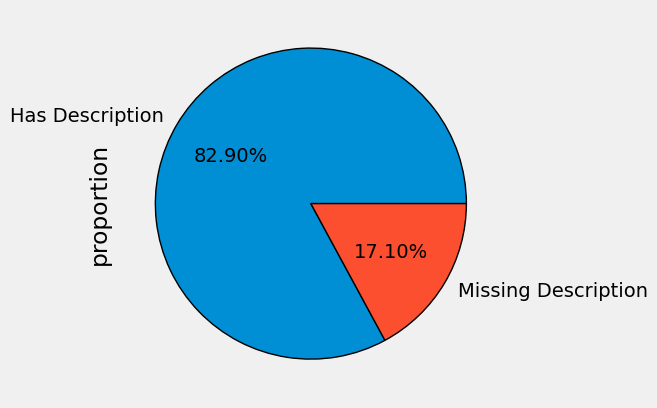

In [13]:
temp = (books.description.str.len() == 0).value_counts(True)
temp.index = temp.index.map({False : "Has Description", True: "Missing Description"})
temp.plot.pie(wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True}, autopct = '%.2f%%')
plt.show()

In [14]:
books.head(3)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,...,,,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454,1,42749946,The Switchblade Mamma,The Switchblade Mamma
1,2205073346,2,[],US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",,false,3.94,,...,1,,2016,https://www.goodreads.com/book/show/30128855-c...,https://images.gr-assets.com/books/1462644346m...,30128855,16,50558228,Cruelle,Cruelle
2,,5,"[246830, 362583, 362581, 623032]",US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",,false,4.28,,...,,,2012,https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,13571772,51,102217,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...


In [15]:
books.language_code.value_counts()

language_code
       29614
eng    29520
fre     4257
ind     3965
spa     3956
       ...  
slv        1
inh        1
ach        1
pes        1
en         1
Name: count, Length: 72, dtype: int64

In [16]:
print(f"books without a specified language : {len(books[books.language_code.str.len() == 0])}")

books without a specified language : 29614


In [17]:
books[books.language_code.str.len() == 0].head(5)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,1,[],US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",B00NLXQ534,true,4.12,,...,,,,https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,25742454,1,42749946,The Switchblade Mamma,The Switchblade Mamma
5,1933617640,7,[910384],US,,"[{'count': '15', 'name': 'to-read'}, {'count':...",,false,3.44,,...,1,,2007,https://www.goodreads.com/book/show/2250580.A_...,https://s.gr-assets.com/assets/nophoto/book/11...,2250580,46,2256459,"A.I. Revolution, Vol. 1","A.I. Revolution, Vol. 1"
7,1592912737,2,[961379],US,,"[{'count': '24', 'name': 'to-read'}, {'count':...",,false,3.16,,...,3,,2016,https://www.goodreads.com/book/show/27036537-c...,https://images.gr-assets.com/books/1453061084m...,27036537,38,47077784,"Crossed, Volume 15","Crossed, Volume 15"
8,1592912753,5,"[981445, 981448]",US,,"[{'count': '17', 'name': 'to-read'}, {'count':...",,false,3.51,,...,3,,2016,https://www.goodreads.com/book/show/27036538-c...,https://images.gr-assets.com/books/1453061556m...,27036538,44,47077785,"Crossed + One Hundred, Volume 2 (Crossed +100 #2)","Crossed + One Hundred, Volume 2 (Crossed +100 #2)"
9,159291277X,4,[834956],US,,"[{'count': '35', 'name': 'to-read'}, {'count':...",,false,4.00,,...,6,,2016,https://www.goodreads.com/book/show/27036539-w...,https://images.gr-assets.com/books/1453685087m...,27036539,32,47077786,"War Stories, Volume 4","War Stories, Volume 4"


In [18]:
books.country_code.value_counts()

country_code
US    89411
Name: count, dtype: int64

In [19]:
books.work_id.value_counts()

work_id
4358649     40
392838      37
1228437     36
13344769    32
1104159     30
            ..
41295578     1
41295579     1
41295577     1
51766561     1
49145631     1
Name: count, Length: 62944, dtype: int64

In [20]:
books.format.value_counts()

format
Paperback                             47305
                                      21696
Hardcover                             15031
ebook                                  1582
Mass Market Paperback                  1032
                                      ...  
17,2 x 19,2 x 12,2 cm                     1
Manga Online                              1
Tankobon                                  1
Trade Cloth                               1
Paperback, Direct Sales Comic Book        1
Name: count, Length: 233, dtype: int64

In [21]:
books.format.isna().value_counts(), (books.format.str.len() == 0).value_counts()

(format
 False    89411
 Name: count, dtype: int64,
 format
 False    67715
 True     21696
 Name: count, dtype: int64)

In [22]:
books.authors.head(3)

0    [{'author_id': '8551671', 'role': ''}]
1    [{'author_id': '3274315', 'role': ''}]
2      [{'author_id': '37450', 'role': ''}]
Name: authors, dtype: object

In [23]:
books.edition_information[books.edition_information.str.len() > 0 ].head(3)

25    revised first edition
30         Hellboy presenta
34      Absolute en 2 tomos
Name: edition_information, dtype: object

In [24]:
(books.link == books.url).all()

True

In [25]:
books.link.isna().value_counts(), books.url.isna().value_counts()

(link
 False    89411
 Name: count, dtype: int64,
 url
 False    89411
 Name: count, dtype: int64)

In [26]:
books.image_url.isna().value_counts()

image_url
False    89411
Name: count, dtype: int64

In [27]:
books.image_url.value_counts()

image_url
https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png    32017
https://images.gr-assets.com/books/1358135058m/6636855.jpg                                      1
https://images.gr-assets.com/books/1312036075m/6245236.jpg                                      1
https://images.gr-assets.com/books/1401100239m/22324967.jpg                                     1
https://images.gr-assets.com/books/1435527138m/5822946.jpg                                      1
                                                                                            ...  
https://images.gr-assets.com/books/1489312623m/32918990.jpg                                     1
https://images.gr-assets.com/books/1493548071m/32918996.jpg                                     1
https://images.gr-assets.com/books/1407292664m/22878126.jpg                                     1
https://images.gr-assets.com/books/1418734810m/1475747.jpg                                      1
https://im

Series represents book in multiple languages.

In [28]:
books[books.series.apply(lambda x : x == ['377031'])][['title', 'language_code', 'series', 'work_id']]

,title,language_code,series,work_id
2877,"Berserk, Vol. 1 (Berserk, #1)",eng,[377031],241146
15440,Berserk Collection n. 1,ita,[377031],241146
16549,Berserk #01,spa,[377031],241146
22761,"Berserk, tome 01",fre,[377031],241146
47966,"Berserk 1. Cilt (Berserk, #1)",tur,[377031],241146
61408,ベルセルク 1,jpn,[377031],241146
61415,"Berserk, Volume 01 (Berserk #1)",por,[377031],241146
81268,"ベルセルク 1 (Berserk, #1)",jpn,[377031],241146


Same for work id

In [29]:
books[books.work_id == 241146][['title', 'language_code', 'series', 'work_id']]

,title,language_code,series,work_id
2877,"Berserk, Vol. 1 (Berserk, #1)",eng,[377031],241146
15440,Berserk Collection n. 1,ita,[377031],241146
16549,Berserk #01,spa,[377031],241146
22761,"Berserk, tome 01",fre,[377031],241146
47966,"Berserk 1. Cilt (Berserk, #1)",tur,[377031],241146
61408,ベルセルク 1,jpn,[377031],241146
61415,"Berserk, Volume 01 (Berserk #1)",por,[377031],241146
81268,"ベルセルク 1 (Berserk, #1)",jpn,[377031],241146


In conclusion, there isn't a way to represent all books of a manga by a single one.

In [30]:
#some books don't have any language_code therefore we assume that they are english
filt = ((books.language_code == 'eng') | (books.language_code.str.len() == 0))
books_eng = books[filt]

In [31]:
books_eng[books_eng.language_code.str.len() == 0].title

0                                    The Switchblade Mamma
5                                  A.I. Revolution, Vol. 1
7                                       Crossed, Volume 15
8        Crossed + One Hundred, Volume 2 (Crossed +100 #2)
9                                    War Stories, Volume 4
                               ...                        
89393                                     Manga Messengers
89395    The Dirty Dozen: The Best 12 Commando Books Ev...
89396                                  Red String Volume 1
89406                 Doctor Who: Free Comic Book Day 2016
89407                                      Love: The Tiger
Name: title, Length: 29614, dtype: object

The ratings count is greater than the actual ratings in interactions and reviews.

In [32]:
book_id = 2348385
a = books[books.book_id == book_id][['title', 'ratings_count', 'text_reviews_count']]
b = pd.DataFrame([interactions[interactions.book_id == book_id].shape[0]], columns=['actual_ratings_and_reviews_count'])
pd.concat([a.reset_index(drop=True),b], axis=1)

,title,ratings_count,text_reviews_count,actual_ratings_and_reviews_count
0,"Claymore, Vol. 12: The Souls of the Fallen (Cl...",1240,25,313


In [33]:
books_eng_important_columns = ["book_id", "title", "description", "authors", "url", "image_url", 'popular_shelves', 'authors']

In [34]:
books_eng = books_eng[books_eng_important_columns]
books_eng.head(3)

,book_id,title,description,authors,url,image_url,popular_shelves,authors
0,25742454,The Switchblade Mamma,Lillian Ann Cross is forced to live the worst ...,"[{'author_id': '8551671', 'role': ''}]",https://www.goodreads.com/book/show/25742454-t...,https://s.gr-assets.com/assets/nophoto/book/11...,"[{'count': '228', 'name': 'to-read'}, {'count'...","[{'author_id': '8551671', 'role': ''}]"
2,13571772,Captain America: Winter Soldier (The Ultimate ...,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",https://www.goodreads.com/book/show/13571772-c...,https://images.gr-assets.com/books/1333287305m...,"[{'count': '493', 'name': 'to-read'}, {'count'...","[{'author_id': '37450', 'role': ''}]"
3,35452242,Bounty Hunter 4/3: My Life in Combat from Mari...,The fight for Jason Delgado's life and soul be...,"[{'author_id': '16209952', 'role': ''}, {'auth...",https://www.goodreads.com/book/show/35452242-b...,https://s.gr-assets.com/assets/nophoto/book/11...,"[{'count': '222', 'name': 'to-read'}, {'count'...","[{'author_id': '16209952', 'role': ''}, {'auth..."


## popular_shelves

In [35]:
v = books_eng.popular_shelves.iloc[:].apply(lambda x : {v['name'] : int(v['count']) for v in x})

In [36]:
counter = Counter()
_ = v.apply(counter.update)

In [37]:
pd.Series(counter.keys()).value_counts()

to-read                       1
peach-fuzz                    1
8-monthly-girls-nozaki-kun    1
love-thehero                  1
love-theheroine               1
                             ..
visual-recording              1
graphic-facilitation          1
not-just-spandex-and-capes    1
apocaliptico                  1
google-read                   1
Name: count, Length: 138714, dtype: int64

# Interactions / reviews

In [38]:
interactions.columns

Index(['user_id', 'book_id', 'is_read', 'rating', 'review_text_incomplete',
       'date_added', 'date_updated', 'read_at', 'started_at'],
      dtype='object')

In [39]:
reviews.columns

Index(['user_id', 'book_id', 'rating', 'review_text', 'date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'],
      dtype='object')

Interactions and reviews don't have nan values.

In [40]:
interactions.isna().any().any(), reviews.isna().any().any()

(False, False)

In [41]:
interactions.head(3)

,user_id,book_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
review_id,,,,,,,,,
6b4db26aafeaf0da77c7de6214331e1e,8842281e1d1347389f2ab93d60773d4d,836610,False,0,,Mon Aug 21 12:11:00 -0700 2017,Mon Aug 21 12:11:00 -0700 2017,,
99b27059f711c37de8f90ee8e4dc0d1b,8842281e1d1347389f2ab93d60773d4d,7648967,False,0,,Fri Feb 24 08:59:44 -0800 2017,Fri Feb 24 08:59:44 -0800 2017,,
cb944d94854df5afd22210bb0aa0c903,8842281e1d1347389f2ab93d60773d4d,15704307,False,0,,Wed May 20 21:28:56 -0700 2015,Wed May 20 21:28:57 -0700 2015,,


In [42]:
reviews.head(3)

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
review_id,,,,,,,,,,
66b2ba840f9bd36d6d27f46136fe4772,dc3763cdb9b2cae805882878eebb6a32,18471619,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,,0,0
72f1229aba5a88f9e72f0dcdc007dd22,bafc2d50014200cda7cb2b6acd60cd73,6315584,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Wed Aug 10 00:00:00 -0700 2016,0,0
a75309355f8662caaa5e2c92ab693d3f,bafc2d50014200cda7cb2b6acd60cd73,29847729,4,"A very quick introduction, this is coming out ...",Thu Apr 21 07:44:00 -0700 2016,Thu Apr 21 07:59:28 -0700 2016,Thu Apr 21 07:59:28 -0700 2016,Thu Apr 21 00:00:00 -0700 2016,0,0


All reviews are in interactions

In [43]:
(reviews.index.isin(interactions.index)).all()

True

Reviews have 2 extra columns n_votes, n_comments and 1 renamed column: review_text instead of review_text_incomplete</br>
review_text_incomplete has different values than review_text

In [44]:
extra_reviews_columns = reviews.columns[reviews.columns.isin(interactions.columns) == False]
extra_reviews_columns

Index(['review_text', 'n_votes', 'n_comments'], dtype='object')

In [45]:
(interactions.loc[reviews.index].review_text_incomplete == reviews.review_text).all()

False

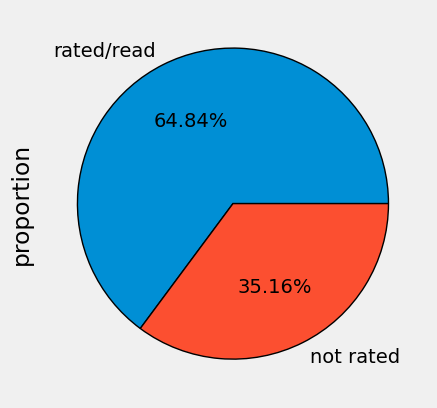

In [46]:
interactions_rated_or_read_filt = (interactions.is_read == True) | (interactions.rating != 0)
ratings_percent = (interactions_rated_or_read_filt).value_counts(True)
ratings_percent.index = ratings_percent.index.map({True : 'rated/read', False : 'not rated'})
ratings_percent.plot.pie(wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True}, autopct = '%.2f%%')
plt.show()

I will remove all interactions that weren't read and rated.

In [47]:
interactions.head(3)

,user_id,book_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
review_id,,,,,,,,,
6b4db26aafeaf0da77c7de6214331e1e,8842281e1d1347389f2ab93d60773d4d,836610,False,0,,Mon Aug 21 12:11:00 -0700 2017,Mon Aug 21 12:11:00 -0700 2017,,
99b27059f711c37de8f90ee8e4dc0d1b,8842281e1d1347389f2ab93d60773d4d,7648967,False,0,,Fri Feb 24 08:59:44 -0800 2017,Fri Feb 24 08:59:44 -0800 2017,,
cb944d94854df5afd22210bb0aa0c903,8842281e1d1347389f2ab93d60773d4d,15704307,False,0,,Wed May 20 21:28:56 -0700 2015,Wed May 20 21:28:57 -0700 2015,,


In [48]:
interactions_rated = interactions[interactions_rated_or_read_filt]
interactions_rated = interactions_rated[interactions_rated.book_id.isin(books_eng.book_id)]

In [49]:
book_rating_count = interactions_rated.book_id.value_counts()
book_rating_count.name = "true_ratings_count"
books_eng_1 = pd.concat([books_eng.set_index('book_id'), book_rating_count], axis=1)
books_eng_1.true_ratings_count = books_eng_1.true_ratings_count.fillna(0).astype(int)
books_eng_1 = books_eng_1[books_eng_1.true_ratings_count > 0]

In [50]:
interactions_rated_1 = interactions_rated[interactions_rated.book_id.isin(books_eng_1.index)]

In [51]:
def transform_rating_and_read_to_implicit(x):
    is_read = x['is_read']
    rating = x['rating']
    if rating != 0:
        return rating >= 4
    else:
        return is_read
    
implicit = interactions_rated_1[['is_read', 'rating']].apply(transform_rating_and_read_to_implicit, axis=1)
interactions_rated_2 = interactions_rated_1.copy()
interactions_rated_2['implicit_rating'] = implicit

In [52]:
interactions_rated_1.user_id.value_counts().describe()

count    224512.000000
mean         16.721320
std          61.861842
min           1.000000
25%           1.000000
50%           3.000000
75%          11.000000
max        3811.000000
Name: count, dtype: float64

# Book series

In [53]:
book_series.columns

Index(['numbered', 'note', 'description', 'title', 'series_works_count',
       'series_id', 'primary_work_count'],
      dtype='object')

In [54]:
book_series.numbered.value_counts()

numbered
true     356008
false     44382
Name: count, dtype: int64

In [55]:
book_series[book_series.title.str.contains('Berserk')]

,numbered,note,description,title,series_works_count,series_id,primary_work_count
1672,true,,,Berserker,23,161254,14
1857,true,,Berserk (beruseruku Beruseruku?) is a manga se...,Berserk,39,434393,39
14749,true,,,Berserker,1,1050938,1
24309,true,,Berserk (beruseruku Beruseruku?) is a manga se...,Berserk,39,377033,39
24310,true,,Berserk (beruseruku Beruseruku?) is a manga se...,Berserk,39,377042,39
...,...,...,...,...,...,...,...
373392,true,,Berserk (beruseruku Beruseruku?) is a manga se...,Berserk,39,377049,39
381832,true,,Berserk (beruseruku Beruseruku?) is a manga se...,Berserk,39,569517,39
385200,true,,,Berserker,23,186256,14
391103,true,,Two-in-one german edition of Berserk.,Berserk Max,18,498663,18


In [56]:
book_series.head(5)

,numbered,note,description,title,series_works_count,series_id,primary_work_count
0,true,,,Sun Wolf and Starhawk,9,189911,3
1,true,,This series is also known as * Avalon : Jalina...,Avalon: Web of Magic,14,151854,12
2,true,,"Plot-wise, ""Crowner's Crusade"" is a prequel to...",Crowner John Mystery,15,169353,15
3,true,,,Pluto's Snitch,3,1052227,3
4,false,,,"The Way, With The Enchanted Neighborhood",3,1070125,3


# Book works

In [57]:
book_works.columns

Index(['books_count', 'reviews_count', 'original_publication_month',
       'default_description_language_code', 'text_reviews_count',
       'best_book_id', 'original_publication_year', 'original_title',
       'rating_dist', 'default_chaptering_book_id', 'original_publication_day',
       'original_language_id', 'ratings_count', 'media_type', 'ratings_sum',
       'work_id'],
      dtype='object')

In [58]:
book_works.head(3)

,books_count,reviews_count,original_publication_month,default_description_language_code,text_reviews_count,best_book_id,original_publication_year,original_title,rating_dist,default_chaptering_book_id,original_publication_day,original_language_id,ratings_count,media_type,ratings_sum,work_id
0,1,6,8,,1,5333265,1984,W. C. Fields: A Life on Film,5:1|4:1|3:1|2:0|1:0|total:3,,,,3,book,12,5400751
1,22,10162,,,741,25717,2001,Good Harbor,5:517|4:1787|3:2763|2:966|1:196|total:6229,,,,6229,book,20150,1323437
2,2,268,,,7,7327624,1987,,5:49|4:58|3:26|2:5|1:3|total:141,,,,141,book,568,8948723


# Book authors

In [59]:
books.authors.head(5)

0               [{'author_id': '8551671', 'role': ''}]
1               [{'author_id': '3274315', 'role': ''}]
2                 [{'author_id': '37450', 'role': ''}]
3    [{'author_id': '16209952', 'role': ''}, {'auth...
4    [{'author_id': '81563', 'role': ''}, {'author_...
Name: authors, dtype: object

In [60]:
authors.head(5)

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


# Book genres

these genres are too vague

In [61]:
c1 = Counter()
book_genres.genres.apply(c1.update)
c1

Counter({'fiction': 396699795,
         'fantasy, paranormal': 261701592,
         'young-adult': 113748515,
         'history, historical fiction, biography': 102232444,
         'mystery, thriller, crime': 94226447,
         'romance': 83142002,
         'children': 57752225,
         'non-fiction': 48078235,
         'comics, graphic': 19114748,
         'poetry': 6897839})